In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from datetime import datetime
import os
import glob
from urllib import parse

import requests
import json
import pickle

In [2]:
path = "../data/reddit_uk_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))

dfs = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
dfs.head(10)

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,selftext,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
0,null,null,True,[deleted],null,null,1202300882,1202300882,null,null,...,NaN,False,cambridge,t5_2qh8u,null,null,self,"Pardon me Cambridge Sub-redditors, but is this...",5,http://www.reddit.com/r/cambridge/comments/67u...
1,null,null,True,[deleted],null,null,1202314701,1202314701,null,null,...,NaN,False,cambridge,t5_2qh8u,null,null,default,Only in Cambridge… No Parking Sign [pic],3,http://blogs.townonline.com/cambridge/?p=12892
2,null,null,True,[deleted],null,null,1203597102,1203597102,null,null,...,NaN,False,cambridge,t5_2qh8u,null,null,default,"“The Simpsons Backstage Tour,” lecture at Harv...",1,http://140.247.118.196/lfp/details.cfm?EVENT_I...
3,null,null,True,[deleted],null,null,1204066257,1204066257,null,null,...,[deleted],False,cambridge,t5_2qh8u,null,null,default,Comcast acknowledges that it hired people to t...,1,http://www.portfolio.com/news-markets/top-5/20...
4,null,null,True,[deleted],null,null,1204903812,1204903812,null,null,...,NaN,False,cambridge,t5_2qh8u,null,null,default,Openly Gay Black Politicians Take On Anti-Gay ...,1,http://www.alternet.org/blogs/peek/78963/
5,null,null,True,mjsolaro,null,Rassilon,1206725772,1206722172,null,null,...,NaN,False,doctorwho,t5_2qhek,null,null,default,Doctor Who Season 4 Trailer!,10,http://infoaddict.com/post/title/dr-who-season...
6,null,null,True,[deleted],null,null,1206766858,1206763258,null,null,...,[deleted],False,doctorwho,t5_2qhek,null,null,default,Doctor Who Time Crash Mini-Episode,12,http://www.youtube.com/watch?v=Um_8unOhPvs
7,null,null,True,Escafane,null,null,1207162142,1207158542,null,null,...,NaN,False,unitedkingdom,t5_2qhqb,null,null,default,Mortgage brokers braced for Halifax to pull deals,1,http://business.timesonline.co.uk/tol/business...
8,null,null,True,Escafane,null,null,1207169055,1207165455,null,null,...,NaN,False,unitedkingdom,t5_2qhqb,null,null,default,Mortgage approvals come crashing down,1,http://ukhousebubble.blogspot.com/2008/04/mort...
9,null,null,True,Escafane,null,null,1207169137,1207165537,null,null,...,NaN,False,unitedkingdom,t5_2qhqb,null,null,default,Tea - A Brief History of the Nation's Favourit...,1,http://www.tea.co.uk/index.php?pgId=47


In [4]:
dates = [datetime.fromtimestamp(t) for t in dfs['created_utc'].astype(int)]
dfs['dates'] = dates
dfs.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url,dates
0,null,null,True,[deleted],null,null,1202300882,1202300882,null,null,...,False,cambridge,t5_2qh8u,null,null,self,"Pardon me Cambridge Sub-redditors, but is this...",5,http://www.reddit.com/r/cambridge/comments/67u...,2008-02-06 13:28:02
1,null,null,True,[deleted],null,null,1202314701,1202314701,null,null,...,False,cambridge,t5_2qh8u,null,null,default,Only in Cambridge… No Parking Sign [pic],3,http://blogs.townonline.com/cambridge/?p=12892,2008-02-06 17:18:21
2,null,null,True,[deleted],null,null,1203597102,1203597102,null,null,...,False,cambridge,t5_2qh8u,null,null,default,"“The Simpsons Backstage Tour,” lecture at Harv...",1,http://140.247.118.196/lfp/details.cfm?EVENT_I...,2008-02-21 13:31:42
3,null,null,True,[deleted],null,null,1204066257,1204066257,null,null,...,False,cambridge,t5_2qh8u,null,null,default,Comcast acknowledges that it hired people to t...,1,http://www.portfolio.com/news-markets/top-5/20...,2008-02-26 23:50:57
4,null,null,True,[deleted],null,null,1204903812,1204903812,null,null,...,False,cambridge,t5_2qh8u,null,null,default,Openly Gay Black Politicians Take On Anti-Gay ...,1,http://www.alternet.org/blogs/peek/78963/,2008-03-07 16:30:12


In [5]:
dfs.describe()

,created,created_utc,downs,gilded,num_comments,retrieved_on,score,ups
count,5.796460e+05,5.796460e+05,579646.0,579646.000000,579646.00000,5.796460e+05,579646.000000,579646.000000
mean,1.380804e+09,1.380801e+09,0.0,0.000400,13.29148,1.441812e+09,29.602048,29.602048
std,4.225964e+07,4.225949e+07,0.0,0.021338,47.05585,7.545260e+05,126.852065,126.852065
min,1.202301e+09,1.202301e+09,0.0,0.000000,-1.00000,1.440525e+09,0.000000,0.000000
25%,1.350610e+09,1.350607e+09,0.0,0.000000,1.00000,1.441088e+09,1.000000,1.000000
50%,1.386815e+09,1.386815e+09,0.0,0.000000,4.00000,1.442016e+09,5.000000,5.000000
75%,1.415865e+09,1.415865e+09,0.0,0.000000,12.00000,1.442477e+09,16.000000,16.000000
max,1.441069e+09,1.441065e+09,0.0,3.000000,8039.00000,1.443171e+09,5437.000000,5437.000000


In [6]:
dfs.shape

(579646, 51)

In [7]:
titles = dfs.loc[:]['title'].str.lower()
pattern = ' schweiz | switzerland | swiss | schweizerisch | suizo | suiza | suisse | svizzero | svizzera'
idx = titles.str.contains(pattern)
swiss_occurance = titles[idx]
swiss_occurance.shape

(101,)

In [8]:
pattern += ' geneva | genéve | ginevra | genf | zurich | zurigo | zürich | berne | bern | berna | basel | bâle | basilea | \
 lucerne | luzern | lausanne | losanna | lugano | lauis | zermatt | schaffhausen | interlaken | thun | grindelwald | davos '
idx = titles.str.contains(pattern)
swiss_occurance = titles[idx]
swiss_occurance.shape

(224,)

In [9]:
swiss_specific_df = dfs.loc[idx][:]
swiss_specific_df.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,created,created_utc,disable_comments,distinguished,...,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url,dates
314,null,null,True,igeldard,cnty-england,Kent,1271794969,1271791369,null,null,...,False,unitedkingdom,t5_2qhqb,null,null,NaN,Disabled pensioner charged with possession of ...,8,http://swns.com/disabled-pensioner-charged-wit...,2010-04-20 21:22:49
404,null,null,True,dulieu,null,null,1285591647,1285588047,null,null,...,False,unitedkingdom,t5_2qhqb,null,null,NaN,"Wolseley, the 123-year-old company and the wor...",1,http://www.telegraph.co.uk/finance/newsbysecto...,2010-09-27 13:47:27
193,null,null,True,quentinnuk,eng-sussex,Brighton,1291495019,1291495019,null,null,...,False,unitedkingdom,t5_2qhqb,null,null,NaN,"Now Cadbury, under new US ownership of Kraft, ...",91,http://www.bbc.co.uk/news/uk-11919248,2010-12-04 21:36:59
1320,null,null,True,BlueRock,null,null,1306413768,1306410168,null,null,...,False,unitedkingdom,t5_2qhqb,null,null,default,Europe divided over nuclear power after Fukush...,0,http://www.guardian.co.uk/environment/2011/may...,2011-05-26 13:42:48
1371,null,null,True,[deleted],null,null,1308433715,1308430115,null,null,...,False,LiverpoolFC,t5_2qn0o,null,null,self,after seeing Shaqiri for Switzerland multiple ...,5,http://www.reddit.com/r/LiverpoolFC/comments/i...,2011-06-18 22:48:35


In [11]:
month_dict = ['Jan','Feb','March','April','May','June','July','August','Sept','Oct','Nov','Dec']
swiss_specific_df['month_year'] = [month_dict[swiss_specific_df.dates.iloc[i].month-1] + '_' 
                                   + str(swiss_specific_df.dates.iloc[i].year) for i in range(len(swiss_specific_df))]

In [13]:
df_most_popular_per_month = swiss_specific_df.groupby('month_year')[['num_comments','title','created_utc','subreddit']].max()

(-0.40000000000000002, 17.400000000000002, 0.0, 2111.0)

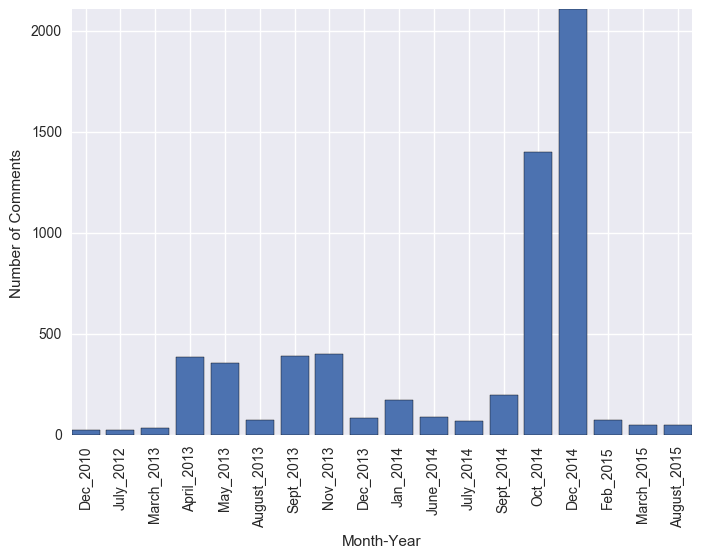

In [19]:
df_sorted = df_most_popular_per_month.query('num_comments>20').sort_values('created_utc')
plt.bar(range(len(df_sorted.index)),df_sorted.num_comments,align='center')
plt.xlabel('Month-Year')
plt.ylabel('Number of Comments')
plt.xticks(range(len(df_sorted.index)),df_sorted.index, rotation = 'vertical')
plt.axis('tight')

In [18]:
tmp = df_most_popular_per_month.sort_values('num_comments',ascending=False)
for i in range(0,15):
    print('Submission: '+ tmp.iloc[i]['title'])
    print('Subreddit: '+ tmp.iloc[i]['subreddit'])
    print('Month-Year: ' + tmp.index[i])
    print('******************************')

Submission: What is a more important win. Basel or man u?
Subreddit: LiverpoolFC
Month-Year: Dec_2014
******************************
Submission: Video of alleged fighting between Basel and Liverpool fans before the CL game.
Subreddit: LiverpoolFC
Month-Year: Oct_2014
******************************
Submission: Rotary team up with Chelsea. 4 years deal with the swiss watch brand.
Subreddit: chelseafc
Month-Year: Nov_2013
******************************
Submission: Who is your Cheslea vs. Basel starting XI and why
Subreddit: swansea
Month-Year: Sept_2013
******************************
Submission: Tottenham suffer shootout misery against Basel after heroic fightback
Subreddit: doctorwho
Month-Year: April_2013
******************************
Submission: Pre-Match Thread: Chelsea v Basel [May 5, 16:00 GMT]
Subreddit: londoncycling
Month-Year: May_2013
******************************
Submission: We actually looked convincing tonight, and won - despite being below Switzerland in the FIFA rankings

(-0.5, 399.5, 199.5, -0.5)

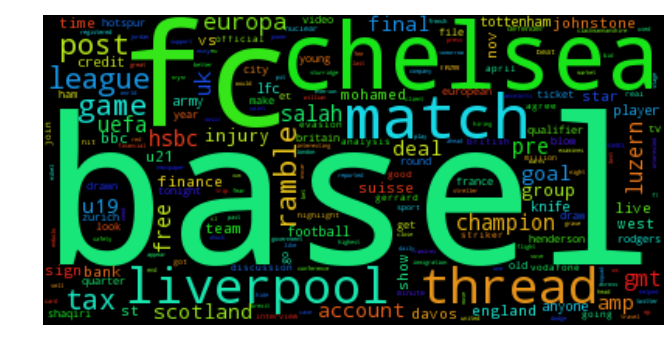

In [10]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
submissions = swiss_specific_df['title'].astype('str').tolist()
subs_concat = ' '.join(submissions)

tokens = nltk.word_tokenize(subs_concat)

filter_token = [token.lower() for token in tokens if token not in string.punctuation ]


lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in filter_token]


subs_filtered = ' '.join(lemanized)
extended_stopwords=['swiss','switzerland','ha','wa','say', 'could'] + stopwords.words('english')
wordcloud = WordCloud(stopwords = extended_stopwords).generate(subs_filtered)
plt.imshow(wordcloud)
plt.axis("off")